In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt


Downloading the aerofit treadmil csv file into the colab

In [ ]:
!wget "https://drive.google.com/uc?export=download&id=17OoDqyXa-mjEq-_2b3DikE4tHoLz21N6" -O aerofit_treadmil.csv

--2024-04-18 09:16:05--  https://drive.google.com/uc?export=download&id=17OoDqyXa-mjEq-_2b3DikE4tHoLz21N6
Resolving drive.google.com (drive.google.com)... 74.125.195.101, 74.125.195.138, 74.125.195.139, ...
Connecting to drive.google.com (drive.google.com)|74.125.195.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=17OoDqyXa-mjEq-_2b3DikE4tHoLz21N6&export=download [following]
--2024-04-18 09:16:05--  https://drive.usercontent.google.com/download?id=17OoDqyXa-mjEq-_2b3DikE4tHoLz21N6&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.195.132, 2607:f8b0:400e:c09::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.195.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7279 (7.1K) [application/octet-stream]
Saving to: ‘aerofit_treadmil.csv’

aerofit_treadmil.cs 100%[===================>]   7.11K  --.-K

In [ ]:
df=pd.read_csv('aerofit_treadmil.csv')

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


the csv file has 180 rows and 9 columns

In [ ]:
df.shape


(180, 9)

datatypes of each field in the CSV file

In [ ]:
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

No Unique columns in the dataset

In [ ]:
for i in df.columns:
 print(i,":",df[i].nunique())

Product : 3
Age : 32
Gender : 2
Education : 8
MaritalStatus : 2
Usage : 6
Fitness : 5
Income : 62
Miles : 37


In [ ]:
df['Product'].describe()

count       180
unique        3
top       KP281
freq         80
Name: Product, dtype: object

 Detect Outliers

In [ ]:
df_1=df['Income'].describe()

In [ ]:
df_1

count       180.000000
mean      53719.577778
std       16506.684226
min       29562.000000
25%       44058.750000
50%       50596.500000
75%       58668.000000
max      104581.000000
Name: Income, dtype: float64

<Axes: ylabel='Income'>

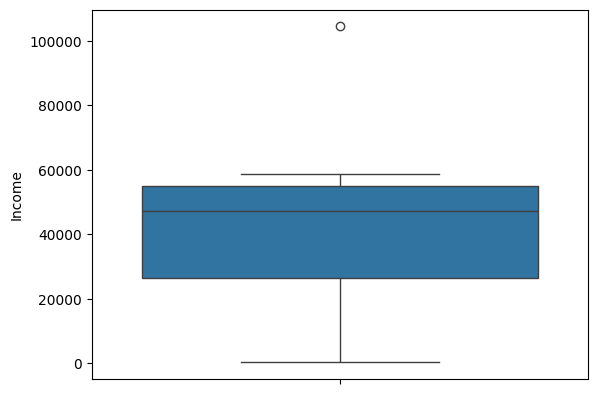

In [ ]:
sns.boxplot(data=df_1)

Detect Outliers (using boxplot, “describe” method by checking the difference between mean and median)

Removed the outliers using the clip method in the numpy

In [ ]:
np.clip(df_1,4409,58668)

count     4409.000000
mean     53719.577778
std      16506.684226
min      29562.000000
25%      44058.750000
50%      50596.500000
75%      58668.000000
max      58668.000000
Name: Income, dtype: float64

In [ ]:
df_2=df['Miles'].describe()
df_2

count    180.000000
mean     103.194444
std       51.863605
min       21.000000
25%       66.000000
50%       94.000000
75%      114.750000
max      360.000000
Name: Miles, dtype: float64

<Axes: ylabel='Miles'>

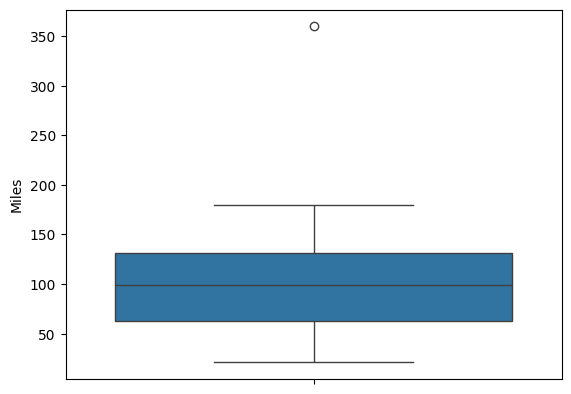

In [ ]:
sns.boxplot(df_2)

In [ ]:
df_3=df['Education'].describe()
df_3

count    180.000000
mean      15.572222
std        1.617055
min       12.000000
25%       14.000000
50%       16.000000
75%       16.000000
max       21.000000
Name: Education, dtype: float64

<Axes: ylabel='Education'>

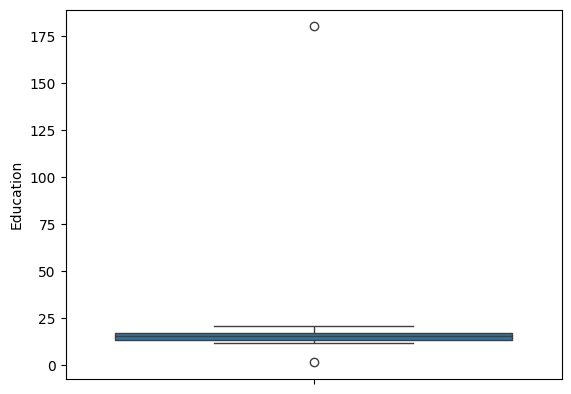

In [ ]:
sns.boxplot(df_3)

In [ ]:
df_3=np.clip(df_3,10,18)

<Axes: ylabel='Education'>

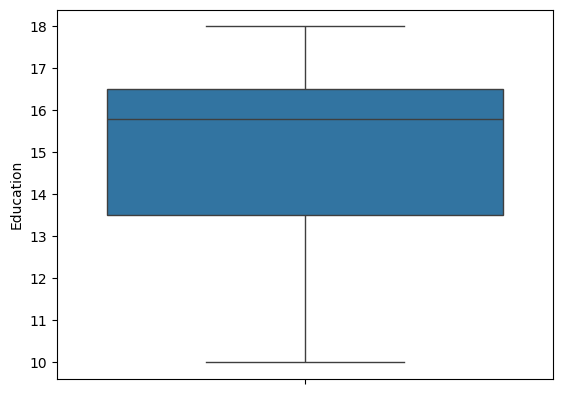

In [ ]:
sns.boxplot(df_3)

Check if features like marital status, Gender, and age have any effect on the product purchased


In [ ]:
df_product_Mar=df.groupby('MaritalStatus').agg({'Product':'count'}).reset_index()
df_product_Mar.T

,0,1
MaritalStatus,Partnered,Single
Product,107,73


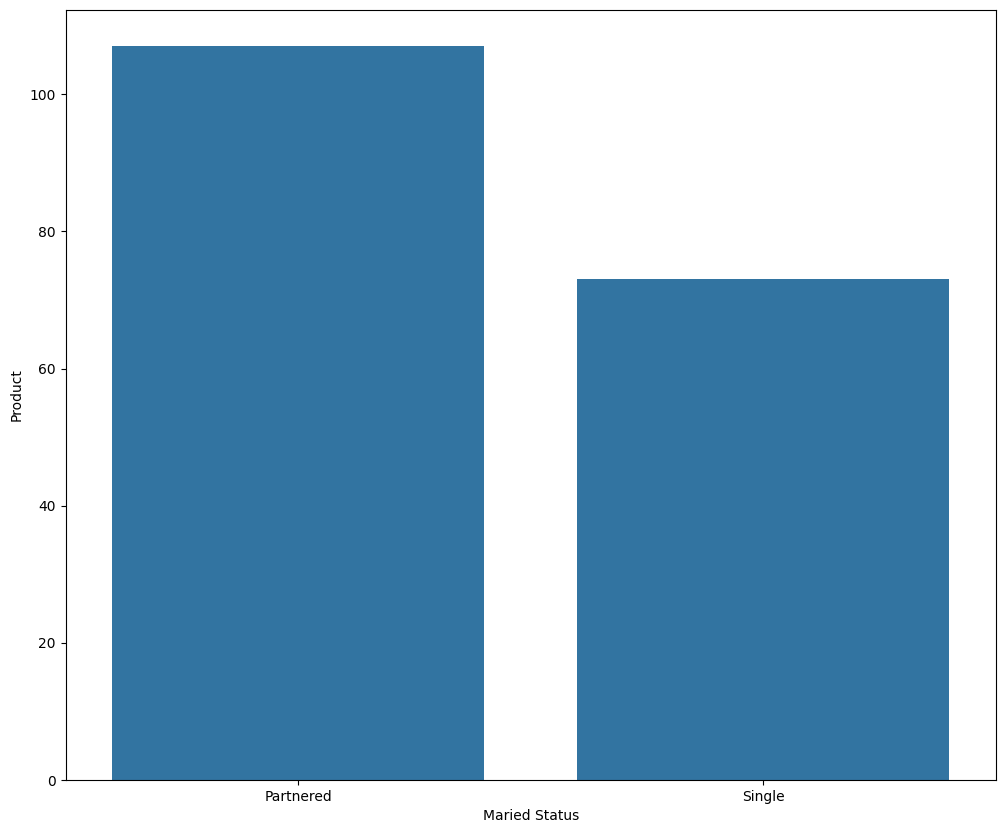

In [ ]:
x=df_product_Mar['MaritalStatus']
y=df_product_Mar['Product']
plt.figure(figsize=(12,10))
sns.barplot(data=df_product_Mar,x=x,y=y)
plt.xlabel('Maried Status')
plt.show()

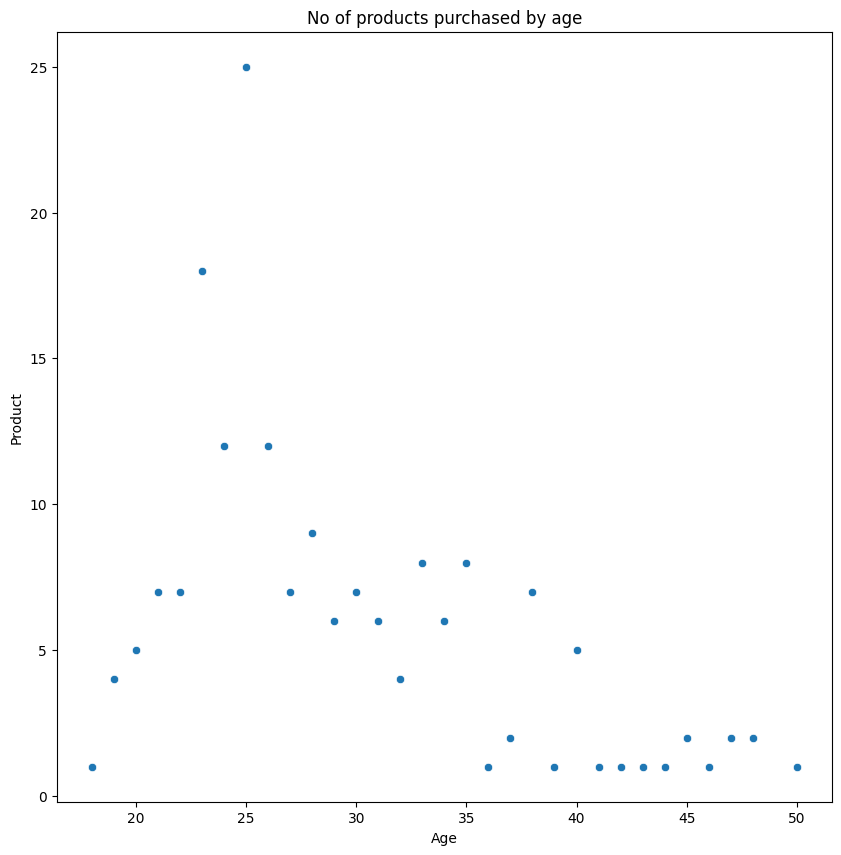

In [ ]:
df_product_age=df.groupby('Age').agg({'Product':'count'}).reset_index()
df_product_age
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_product_age,x=df_product_age['Age'],y=df_product_age['Product'])
plt.title('No of products purchased by age')
plt.show()

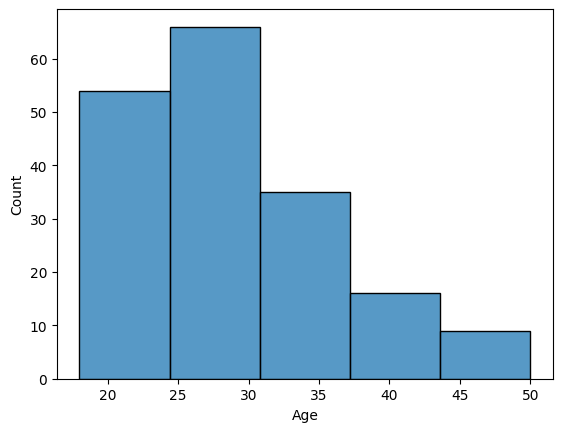

In [ ]:
sns.histplot(df['Age'],bins=5)
plt.show()

In [ ]:
df_product_gender=df.groupby('Gender').agg({'Product':'count'}).reset_index()
df_product_gender

,Gender,Product
0,Female,76
1,Male,104


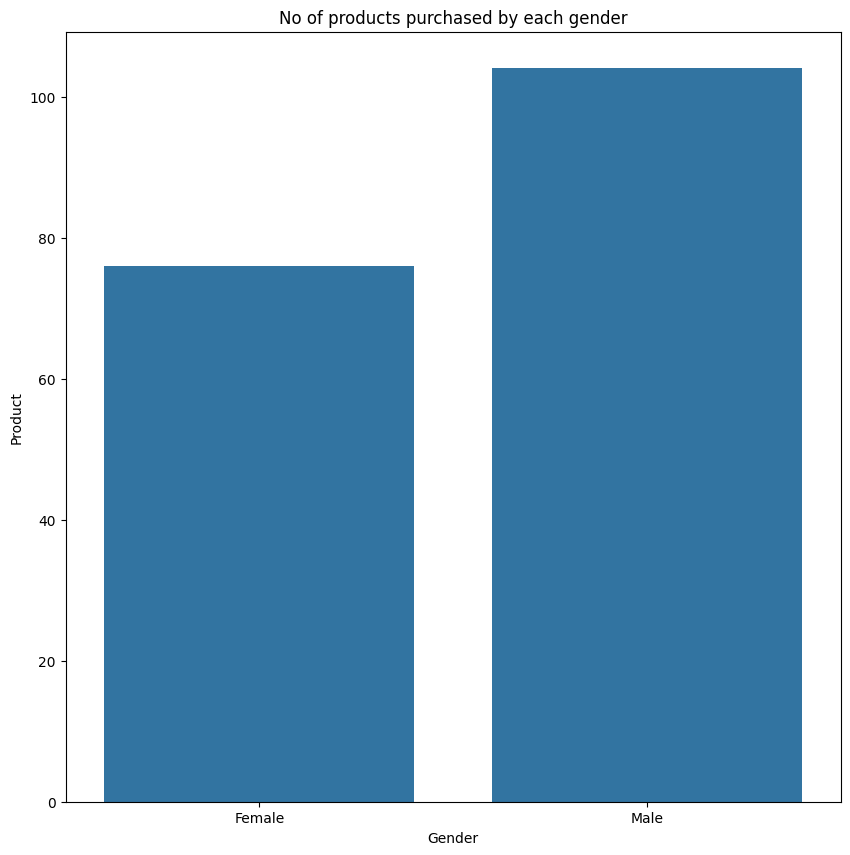

In [ ]:
x=df_product_gender['Gender']
y=df_product_gender['Product']
plt.figure(figsize=(10,10))
sns.barplot(df_product_gender,x=x,y=y)
plt.title('No of products purchased by each gender')
plt.show()

In [ ]:
df.shape

(180, 9)

In [ ]:
df_product=df.groupby('Product')['Age'].count().reset_index()
df_product

,Product,Age
0,KP281,80
1,KP481,60
2,KP781,40


Marginal probability of KP281

In [ ]:
df['Product'].value_counts()

Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64

In [ ]:
pd.crosstab(index=df['Product'],columns=df['Gender'],margins=True)

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


probability of buying the product KP 281 is

In [ ]:
80/180

0.4444444444444444

probability of buying the product KP 481 is

In [ ]:
60/180

0.3333333333333333

probability of buying the product KP 781 is

In [ ]:
40/180

0.2222222222222222

Male customer probability

In [ ]:
104/180

0.5777777777777777

female customer probability

In [ ]:
76/180

0.4222222222222222

a customer is female, what is the probability
she’ll purchase a KP481

customer female and product KP481 is

In [ ]:
29/180

0.16111111111111112

conditional probabilty for KP481 given that the customer is Female is

In [ ]:
((76/180)*(29/180))/(60/180)

0.20407407407407407

a customer is male, what is the probability she’ll purchase a KP481

In [ ]:
((104/180)*(31/180))/(60/180)

0.2985185185185185

5. Corrleation among different factors

In [ ]:
df.head(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [ ]:
df_product_new=df.groupby('Product').aggregate({'Age':'mean','Education':'mean','Usage':'mean','Income':'sum','Miles':'mean'}).reset_index()

In [ ]:
df_product_new[df_product_new['Product']=='KP281']

,Product,Age,Education,Usage,Income,Miles
0,KP281,28.55,15.0375,3.0875,3713442,82.7875


In [ ]:
df_product_new.dtypes

Product     object
Age          int64
Income       int64
Miles      float64
dtype: object

In [ ]:
df_product_new.corr(numeric_only=True)

,Age,Education,Usage,Income,Miles
Age,1.000000,0.796516,0.770990,-0.895843,0.810860
Education,0.796516,1.000000,0.999155,-0.444879,0.999709
Usage,0.770990,0.999155,1.000000,-0.407690,0.997874
Income,-0.895843,-0.444879,-0.407690,1.000000,-0.466339
Miles,0.810860,0.999709,0.997874,-0.466339,1.000000


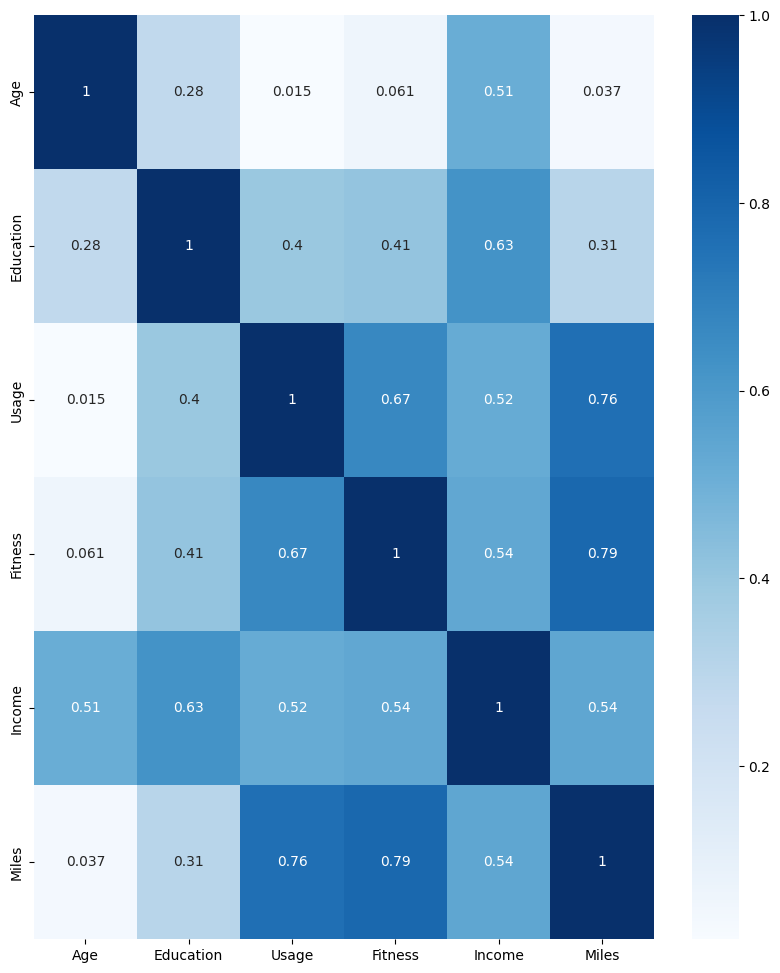

In [ ]:
plt.figure(figsize=(10,12))
sns.heatmap(df.corr(numeric_only=True),cmap='Blues',annot=True)
plt.show()

Usage and miles has good correlations around 0.76
Fitness and miles have good correlation around 0.79
Education and Income have good correlation around 0.63

In [ ]:
Usage and Mi

Customer profiling and recommendation

In [ ]:
df.corr(numeric_only=True)

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
df.groupby('Product').aggregate({'Age':'min','Education':'min'}).reset_index()

,Product,Age,Education
0,KP281,18,12
1,KP481,19,12
2,KP781,22,14


Recommendation -


1.   Product KP 281 has the customer with minimum age 18 and minimum Education level as 12
2.   Product KP 481 has customers with minimum age 19 and minimum Eductaion level  as 12
3. Product KP 481 has customer with minimum age 22 and minimum Education level as 14





In [ ]:
df.groupby('Product').aggregate({'Age':'max','Education':'max'}).reset_index()

,Product,Age,Education
0,KP281,50,18
1,KP481,48,18
2,KP781,48,21




1.  Product KP 281 has the customer with maximum age 50 and maximum Education level as 18
2.  Product KP 481 has customers with maximum age 48 and maximum Eductaion level as 18
3. Product KP 481 has customer with maximum age 48 and maximum Education level as 21


In [ ]:
df_find_age=df.groupby(['Product','Age']).agg({'Usage':'max'}).reset_index()

In [ ]:
max_num_times=df_find_age[df_find_age['Product']=='KP281']['Usage'].max()

In [ ]:
df_find_age_KP281=df_find_age[df_find_age['Product']=='KP281']
df_find_age_KP281[df_find_age_KP281['Usage']==max_num_times]

,Product,Age,Usage
3,KP281,21,5
6,KP281,24,5


Customers with ages 21 and 24 use the product KP281 5 times a week

In [ ]:
max_num_times=df_find_age[df_find_age['Product']=='KP481']['Usage'].max()
df_find_age_KP481=df_find_age[df_find_age['Product']=='KP481']
df_find_age_KP481[df_find_age_KP481['Usage']==max_num_times]

,Product,Age,Usage
31,KP481,21,5
34,KP481,25,5
41,KP481,33,5


Customers with ages 21,25 and 33 use the product KP481 5 times a week

In [ ]:
max_num_times=df_find_age[df_find_age['Product']=='KP781']['Usage'].max()
df_find_age_KP781=df_find_age[df_find_age['Product']=='KP781']
df_find_age_KP781[df_find_age_KP781['Usage']==max_num_times]

,Product,Age,Usage
55,KP781,28,7
56,KP781,29,7


Customers with ages 28 and 29 use the product KP781 7 times a week

In [ ]:
df_find_gender=df.groupby(['Product','Gender'])['Age'].count().reset_index()
df_find_gender

,Product,Gender,Age
0,KP281,Female,40
1,KP281,Male,40
2,KP481,Female,29
3,KP481,Male,31
4,KP781,Female,7
5,KP781,Male,33




*   KP 281 has equal male and female customers
*   KP 481 and KP 781 has more male customers than female customers



In [ ]:
df_find_income=df.groupby('Product').agg({'Income':'sum'})
df_find_income

,Income
Product,
KP281,3713442
KP481,2938419
KP781,3017663


KP281 product has the highest annual income followed by KP781 and KP481

In [ ]:
KP 281 has